In [1]:
import numpy as np

In [25]:
lst_marks = [43,23,34,42,2,73,12,33,22,42,24,34,23,43,54]

min,q1,med,q3,max = np.quantile(a=lst_marks,q=[0,0.25,0.5,0.75,1])


In [16]:
min,q1,med,q3,max

(2.0, 23.0, 34.0, 42.5, 73.0)

In [17]:
IQR = q3 - q1

In [18]:
IQR

19.5

In [19]:
lower_fence = q1-1.5*(IQR)
higher_fence = q3+1.5*(IQR)

In [20]:
lower_fence

-6.25

In [21]:
higher_fence

71.75

<Axes: >

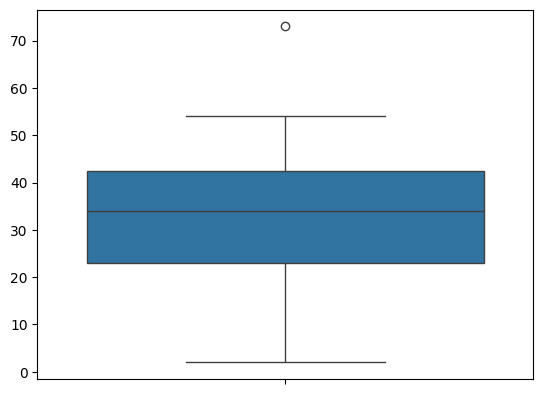

In [26]:
import seaborn as sb

sb.boxplot(lst_marks)

In [29]:
df = sb.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [28]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()

In [32]:
encoded = encoder.fit_transform(df[["sex","smoker","day","time"]]).toarray()

In [33]:
import pandas as pd

In [34]:
encoded_df = pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

In [35]:
encoded_df


,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
239,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
240,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
241,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
242,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [40]:
encoder.transform([["Male","No","Sun","Dinner"]]).toarray()

c:\Users\shara\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[0., 1., 1., 0., 0., 0., 1., 0., 1., 0.]])

In [41]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [46]:
time_mean = df.groupby('time')['total_bill'].mean().to_dict()

In [47]:
time_mean

{'Lunch': 17.168676470588235, 'Dinner': 20.79715909090909}

In [48]:
df["time_value"] = df["time"].map(time_mean)

In [53]:
df[["time","time_value"]].value_counts()

time    time_value        
Dinner  20.79715909090909     176
Lunch   17.168676470588235     68
Name: count, dtype: int64

In [56]:
df.drop(['time'],axis=1)

,total_bill,tip,sex,smoker,day,size,time_value
0,16.99,1.01,Female,No,Sun,2,20.797159
1,10.34,1.66,Male,No,Sun,3,20.797159
2,21.01,3.50,Male,No,Sun,3,20.797159
3,23.68,3.31,Male,No,Sun,2,20.797159
4,24.59,3.61,Female,No,Sun,4,20.797159
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,3,20.797159
240,27.18,2.00,Female,Yes,Sat,2,20.797159
241,22.67,2.00,Male,Yes,Sat,2,20.797159
242,17.82,1.75,Male,No,Sat,2,20.797159
